In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

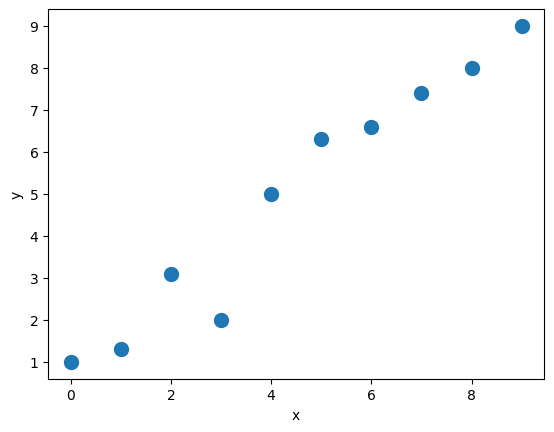

In [10]:
X_train = np.arange(10, dtype="float32").reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype="float32")

plt.plot(X_train, y_train, "o", markersize=10)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## PyTorch とカスタム損失関数による確率的勾配降下法の実装

In [11]:
from torch.utils.data import DataLoader, TensorDataset

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_d1 = DataLoader(train_ds, batch_size, shuffle=True)

In [17]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)


def model(xb):
    return xb @ weight + bias

In [18]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [19]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_d1:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs == 0:
        print(f"{epoch=} Loss: {loss.item():.4f}")

epoch=0 Loss: 39.8977
epoch=10 Loss: 23.7719
epoch=20 Loss: 1.0158
epoch=30 Loss: 14.8444
epoch=40 Loss: 12.4277
epoch=50 Loss: 4.9904
epoch=60 Loss: 0.7894
epoch=70 Loss: 3.7337
epoch=80 Loss: 2.3939
epoch=90 Loss: 0.4472
epoch=100 Loss: 1.1216
epoch=110 Loss: 1.3220
epoch=120 Loss: 0.1076
epoch=130 Loss: 0.5718
epoch=140 Loss: 0.2256
epoch=150 Loss: 1.4922
epoch=160 Loss: 0.0495
epoch=170 Loss: 0.0064
epoch=180 Loss: 0.0017
epoch=190 Loss: 0.0305


Final parameters: weight.item()=2.644019603729248. bias.item()=4.712854862213135


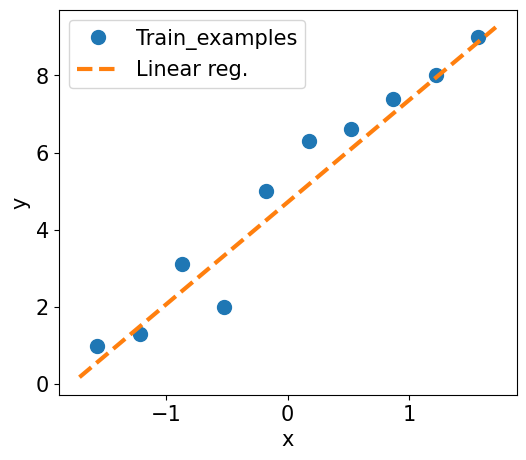

In [22]:
print(f"Final parameters: {weight.item()=}. {bias.item()=}")
X_test = np.linspace(0, 9, num=100, dtype="float32").reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, "o", markersize=10)
plt.plot(X_test_norm, y_pred, "--", lw=3)
plt.legend(["Train_examples", "Linear reg."], fontsize=15)
ax.set_xlabel("x", size=15)
ax.set_ylabel("y", size=15)
ax.tick_params(axis="both", which="major", labelsize=15)

plt.show()

## torcn.nn と torch.optim を使った再実装

In [24]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction="mean")  # torch.nn には一通りの損失関数が準備されている
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)  # 線形層の定義
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # optimizer.step() を呼びすだけで訓練される

In [26]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_d1:
        pred = model(x_batch)[:, 0]  # 予測値を生成
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % log_epochs == 0:
        print(f"{epoch=} Loss: {loss.item():.4f}")

epoch=0 Loss: 17.3596
epoch=10 Loss: 0.5473
epoch=20 Loss: 8.7409
epoch=30 Loss: 0.1664
epoch=40 Loss: 1.8662
epoch=50 Loss: 0.2789
epoch=60 Loss: 0.5117
epoch=70 Loss: 0.9404
epoch=80 Loss: 0.0227
epoch=90 Loss: 1.2027
epoch=100 Loss: 0.0501
epoch=110 Loss: 0.0906
epoch=120 Loss: 0.0746
epoch=130 Loss: 0.4006
epoch=140 Loss: 0.2038
epoch=150 Loss: 0.4675
epoch=160 Loss: 0.1890
epoch=170 Loss: 0.1132
epoch=180 Loss: 0.1179
epoch=190 Loss: 0.0776


Final parameters: model.weight.item()=2.6615240573883057. model.bias.item()=4.8941874504089355


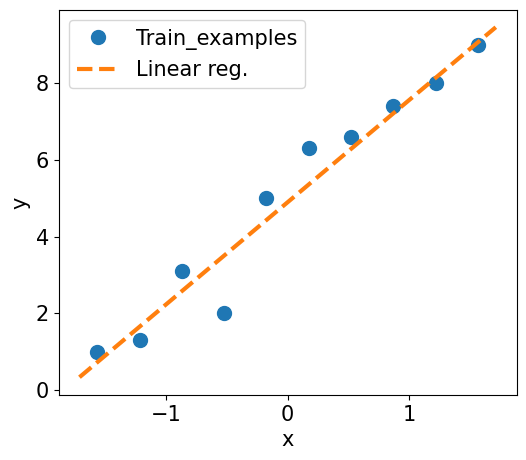

In [27]:
print(f"Final parameters: {model.weight.item()=}. {model.bias.item()=}")
X_test = np.linspace(0, 9, num=100, dtype="float32").reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, "o", markersize=10)
plt.plot(X_test_norm, y_pred, "--", lw=3)
plt.legend(["Train_examples", "Linear reg."], fontsize=15)
ax.set_xlabel("x", size=15)
ax.set_ylabel("y", size=15)
ax.tick_params(axis="both", which="major", labelsize=15)

plt.show()

## 多層パーセプトロン

In [80]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0 / 3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_d1 = DataLoader(train_ds, batch_size, shuffle=True)

### ２つの隠れ層で構成されたモデルを定義する
1. 1つ目の隠れ層は、4つの特徴量からなる入力を受け取り、それらを16個のニューロンに射影する
2. 2つ目の隠れ層は、前の層の16の出力を入力として、3つ（クラスラベルの個数）の出力ニューロンに射影する

In [81]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x


input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [82]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

In [83]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_d1:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_d1.dataset)
    accuracy_hist[epoch] /= len(train_d1.dataset)

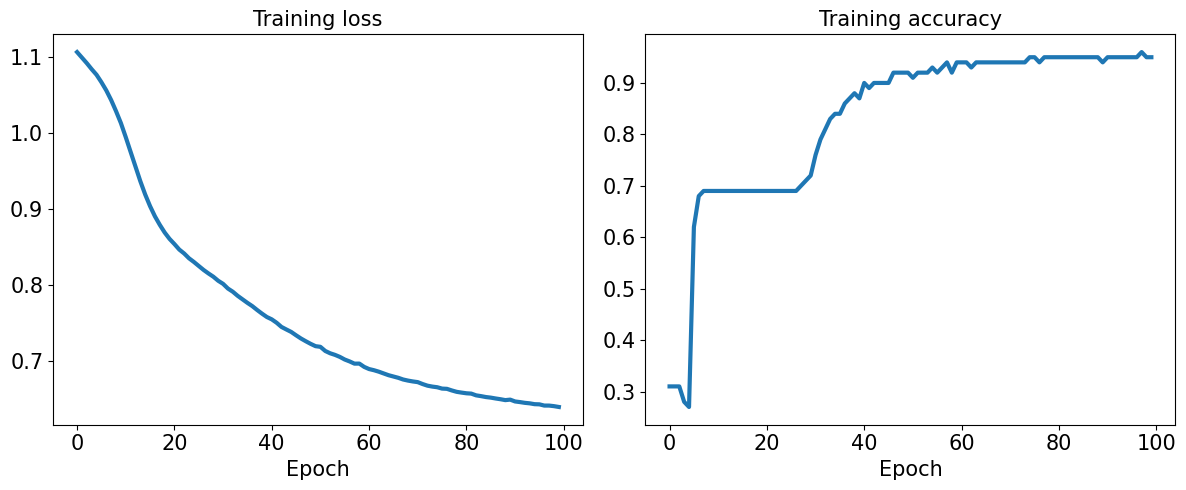

In [84]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_xlabel("Epoch", size=15)
ax.set_title("Training loss", size=15)
ax.tick_params(axis="both", which="major", labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_xlabel("Epoch", size=15)
ax.set_title("Training accuracy", size=15)
ax.tick_params(axis="both", which="major", labelsize=15)

plt.tight_layout()
plt.show()

## テストデータによる評価

In [85]:
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f"Test acc.: {accuracy:.4f}")

Test acc.: 0.9800000190734863


## モデルの保存・読み込み方法

In [86]:
path = "iris_classifier.pt"  # 拡張子は pt か pth が慣習うらしい
torch.save(model, path)

In [87]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [88]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f"Test acc.: {accuracy:.4f}")

Test acc.: 0.9800


In [94]:
path = "iris_classifier_state.pt"  # パラメータだけを保存する
torch.save(model.state_dict(), path)

In [95]:
model_new = Model(input_size, hidden_size, output_size)  # モデルは定義される必要がある
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

In [96]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f"Test acc.: {accuracy:.4f}")

Test acc.: 0.9800
